In [63]:
import pandas as pd
import os

In [79]:
files = [file for file in os.listdir('.') if file.endswith('tuning-machine.csv')]

dfs = []
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)


In [80]:
whole_df = pd.concat(dfs, axis=0)

In [81]:
df = pd.read_csv('v1.0_experience-based.csv')

In [82]:
columns_to_check = [
    'LOC',
    "LongParameterList", "LongMethod", "LongScopeChaining",
    "LongBaseClassList", "LargeClass", "LongMessageChain",
    "ComplexLambdaExpression", "LongTernaryConditionalExpression",
    "ComplexContainerComprehension", "MultiplyNestedContainer"
]

In [83]:
df_no_smell = df[(df[columns_to_check] == 0).all(axis=1)]
df_smelly = df[(df[columns_to_check] != 0).any(axis=1)]

In [84]:
from scipy.stats import mannwhitneyu
from itertools import product

In [85]:
for file in 

SyntaxError: invalid syntax (606585039.py, line 1)

In [86]:
def cliffs_delta(x, y):
    nx, ny = len(x), len(y)
    greater = sum(1 for i, j in product(x, y) if i > j)
    smaller = sum(1 for i, j in product(x, y) if i < j)
    d = (greater - smaller) / (nx * ny)
    return d

stat, p_value = mannwhitneyu(df_no_smell['fault'], df_smelly['fault'], alternative='less')
delta = cliffs_delta(df_smelly['fault'], df_no_smell['fault'])

In [87]:
stat

717.0

In [88]:
p_value

0.2311966919487019

In [89]:
delta

0.0842911877394636

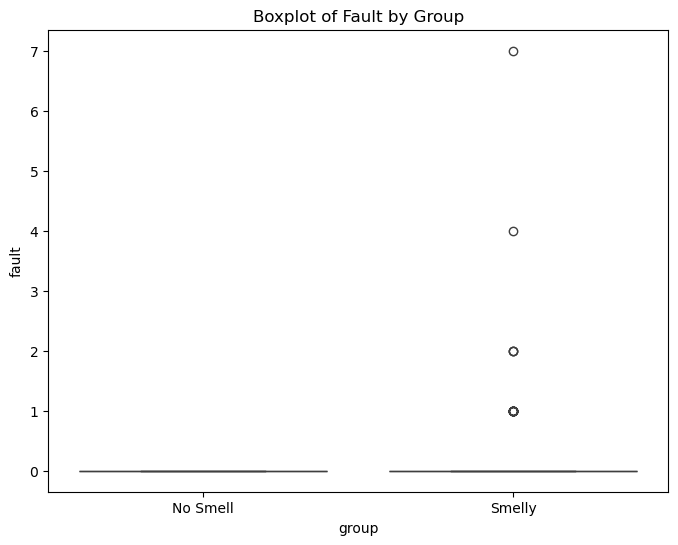

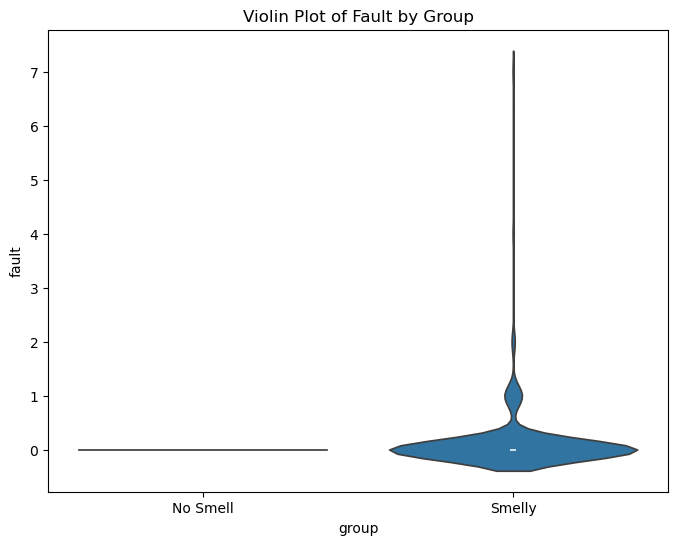

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_no_smell['fault'] and df_smelly['fault'] are the two groups
# You can combine both data into one DataFrame for easier plotting
import pandas as pd

# Create a DataFrame for plotting
data = pd.DataFrame({
    'fault': pd.concat([df_no_smell['fault'], df_smelly['fault']]),
    'group': ['No Smell'] * len(df_no_smell['fault']) + ['Smelly'] * len(df_smelly['fault'])
})

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='fault', data=data)
plt.title('Boxplot of Fault by Group')
plt.show()

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='group', y='fault', data=data)
plt.title('Violin Plot of Fault by Group')
plt.show()


In [91]:
import statsmodels.api as sm
from statsmodels.formula.api import glm
import numpy as np

X = sm.add_constant(whole_df[columns_to_check])

# Dependent variable
y = whole_df['change']

# Fit the Negative Binomial model
model = sm.GLM(y, X, family=sm.families.NegativeBinomial())
results = model.fit()

# Display the results including p-values
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 change   No. Observations:                 4468
Model:                            GLM   Df Residuals:                     4458
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8239.8
Date:                Tue, 03 Dec 2024   Deviance:                       6557.2
Time:                        18:13:04   Pearson chi2:                 1.11e+04
No. Iterations:                    28   Pseudo R-squ. (CS):             0.2788
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

/home/aryan/anaconda3/envs/dpy/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
